In [ ]:
#Collap Drive Bağlama
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import joblib

In [ ]:
#Train ve Test Veri Setleri Kurulumu

path = "/content/drive/MyDrive/Binovist  Sentiment Analysis/data/Hepsiburada Dataset 492k(%10 test)/"

df_train = pd.read_csv(path + "train.csv")
df_test = pd.read_csv(path + "test.csv")

dataframes = {'df_train': df_train, 'df_test': df_test}

yes_responses = {'evet', 'yes', 'y', '1', 'tamam', 'onay', 'olur', 'e'}
no_responses = {'hayır', 'no', 'n', '0', 'hayir', 'olmaz', 'h'}

In [ ]:
df_train_filtered = pd.read_csv(path + "df_train_filtered.csv")
df_test_filtered = pd.read_csv(path + "df_test_filtered.csv")

dataframes_filtered = {'df_train': df_train_filtered, 'df_test': df_test_filtered}

#Eğer Temizleme Sonrası Boş Veri Olursa Çıkarma İşlemi
for name, df in dataframes_filtered.items():
  dataframes_filtered[name] = df.dropna()

In [ ]:
# Oluştururalan yeni temiz verinin veri setine ekstra bir kolonlar'ı
df_train_filtered = dataframes_filtered['df_train']
df_test_filtered = dataframes_filtered['df_test']

X_train=df_train_filtered["processed_text"]
X_test=df_test_filtered["processed_text"]
y_train=df_train_filtered["label_numeric"]
y_test=df_test_filtered["label_numeric"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (152609,)
x_test (48951,)
y_train (152609,)
y_test (48951,)


In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0
0
0


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Naive Bayes pipeline'ı oluşturma
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

# Model pipeline'ınızı tanımlayın
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Parametre ızgarasını tanımlayın
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],          # veya best_max_df'nin belirli değerleri
    'tfidf__min_df': [1, 2, 3],                # veya best_min_df'nin belirli değerleri
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],  # veya best_ngram_range'nin belirli değerleri
    'clf__alpha': [0.1, 0.5, 1.0],             # veya best_alpha'nın belirli değerleri
    'clf__fit_prior': [True, False]            # veya best_fit_prior'ın belirli değerleri
}

# GridSearchCV'yi başlatın
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, return_train_score=True)

# Eğitim verileri ile GridSearchCV'yi fit edin
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.1, 0.5, 1.0],
                         'clf__fit_prior': [True, False],
                         'tfidf__max_df': [0.8, 0.9, 1.0],
                         'tfidf__min_df': [1, 2, 3],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
"""
    'tfidf__max_df': [0.8, 0.9, 1.0],          # veya best_max_df'nin belirli değerleri
    'tfidf__min_df': [1, 2, 3],                # veya best_min_df'nin belirli değerleri
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],  # veya best_ngram_range'nin belirli değerleri
    'clf__alpha': [0.1, 0.5, 1.0],             # veya best_alpha'nın belirli değerleri
    'clf__fit_prior':
    ['tfidf__max_df', 'tfidf__min_df', 'tfidf__ngram_range', 'clf__alpha', 'clf__fit_prior']
"""

In [ ]:
# Sonuçları bir DataFrame'e çevirin
results_df = pd.DataFrame(grid_search.cv_results_)

# Tüm sonuçları yazdırın
print(results_df[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']])

                                                params  mean_test_score  \
0    {'clf__alpha': 0.1, 'clf__fit_prior': True, 't...         0.876783   
1    {'clf__alpha': 0.1, 'clf__fit_prior': True, 't...         0.888637   
2    {'clf__alpha': 0.1, 'clf__fit_prior': True, 't...         0.784869   
3    {'clf__alpha': 0.1, 'clf__fit_prior': True, 't...         0.874745   
4    {'clf__alpha': 0.1, 'clf__fit_prior': True, 't...         0.888611   
..                                                 ...              ...   
157  {'clf__alpha': 1.0, 'clf__fit_prior': False, '...         0.883519   
158  {'clf__alpha': 1.0, 'clf__fit_prior': False, '...         0.743069   
159  {'clf__alpha': 1.0, 'clf__fit_prior': False, '...         0.872118   
160  {'clf__alpha': 1.0, 'clf__fit_prior': False, '...         0.883198   
161  {'clf__alpha': 1.0, 'clf__fit_prior': False, '...         0.716013   

     std_test_score  mean_train_score  std_train_score  
0          0.001306          0.945737     

In [ ]:
#CSV Kaydetme
results_df.to_csv(path + 'navie_bayes_grid_search_results.csv', index=False)

<ipython-input-39-e6e3e6e7631f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores[f'param_{param}'] = scores[f'param_{param}'].astype(str)
<ipython-input-39-e6e3e6e7631f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores[f'param_{param}'] = scores[f'param_{param}'].astype(str)
<ipython-input-39-e6e3e6e7631f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

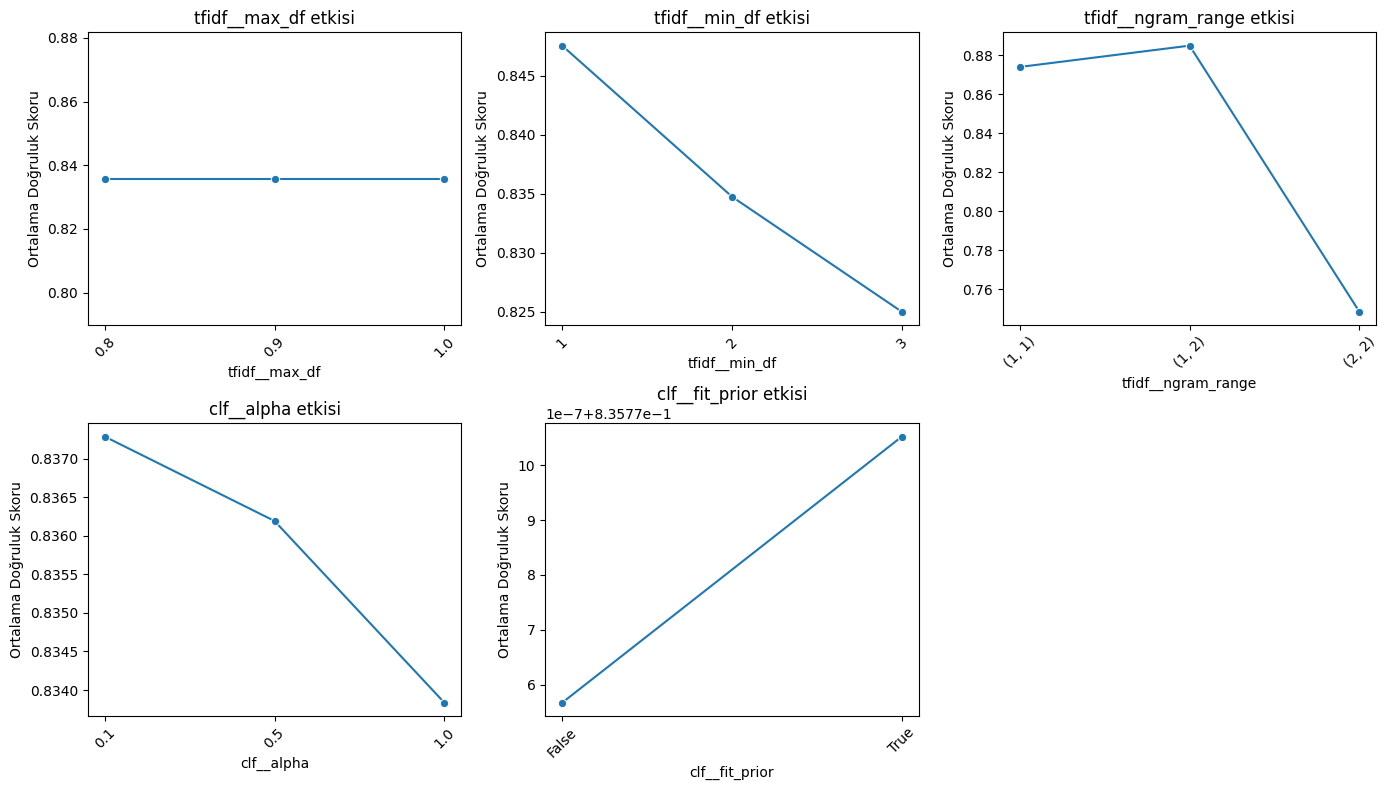

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GridSearchCV sonuçlarını al
results_df = pd.DataFrame(grid_search.cv_results_)

# Her bir parametre için doğruluk oranlarını elde et
param_scores = {}

for param in param_grid.keys():
    # Parametre ve doğruluk skorlarını DataFrame'e al
    scores = results_df[[f'param_{param}', 'mean_test_score']]

    # Kategorik veya karmaşık veri tiplerini (örneğin tuple) stringe çevir
    if scores[f'param_{param}'].dtype == 'object' or isinstance(scores[f'param_{param}'].iloc[0], tuple):
        scores[f'param_{param}'] = scores[f'param_{param}'].astype(str)

    # Parametreye göre gruplama yaparak ortalama doğruluk skorunu bul
    grouped_scores = scores.groupby(f'param_{param}').mean()

    # Sözlükte parametre adını ve skorları sakla
    param_scores[param] = grouped_scores

# Grafik çizmek için her parametre için döngü yap
plt.figure(figsize=(14, 8))

for i, (param, scores) in enumerate(param_scores.items()):
    plt.subplot(2, 3, i + 1)  # 2x3'lük grid düzeni
    sns.lineplot(x=scores.index, y='mean_test_score', data=scores, marker='o')
    plt.title(f'{param} etkisi')
    plt.xlabel(param)
    plt.ylabel('Ortalama Doğruluk Skoru')
    plt.xticks(rotation=45)  # X eksenindeki etiketleri döndürme

plt.tight_layout()
plt.show()

In [ ]:
# En iyi parametreleri al
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

# En iyi doğruluk oranını al
best_accuracy = grid_search.best_score_
print("En iyi doğruluk oranı:", best_accuracy)

En iyi parametreler: {'clf__alpha': 0.1, 'clf__fit_prior': True, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
En iyi doğruluk oranı: 0.8886369613275387


In [ ]:
#Nihai modeli en iyi parametrelerle fit et
final_model = grid_search.best_estimator_

# Nihai modeli tüm eğitim verileriyle fit et
final_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))),
                ('clf', MultinomialNB(alpha=0.1))])

In [ ]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    print("Confusion Matrix :\n")
    print(str(conf_mat) + "\n")
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), ['True Negative', 'True Neutral', 'True Positive'])
    plt.xticks(range(3), ['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'], rotation=10)
    plt.colorbar();
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

              precision    recall  f1-score   support

           0       0.59      0.83      0.69      5655
           1       0.98      0.96      0.97     17087
           2       0.95      0.88      0.92     26209

    accuracy                           0.90     48951
   macro avg       0.84      0.89      0.86     48951
weighted avg       0.92      0.90      0.91     48951

Train Accuracy : 0.992
Test Accuracy : 0.904 

0.8410031010995409 : is the precision score
0.8912819888835745 : is the recall score
0.8586378883630502 : is the f1 score 

Confusion Matrix :

[[ 4696    39   920]
 [  425 16451   211]
 [ 2884   244 23081]]



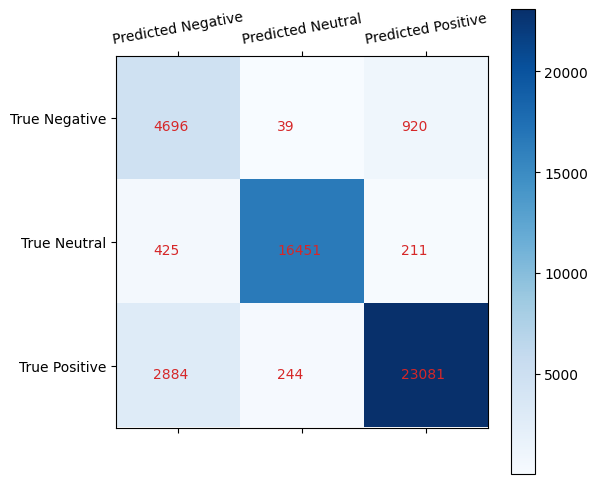

In [ ]:
# Test etme sonuçları kontrol etme
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

#cv_scores = cross_val_score(LogisticRegression, X_train, y_train, cv=50)
#print("CV average score: %.2f" % cv_scores.mean())


result = final_model.predict(X_test)
cr = classification_report(y_test, result)
print(cr)


print('Train Accuracy : %.3f'%final_model.score(X_train, y_train))
print('Test Accuracy : %.3f'%final_model.score(X_test, y_test), "\n")



y_pred = final_model.predict(X_test)
print(precision_score(y_test, y_pred ,average='macro') , ": is the precision score")
print(recall_score(y_test, y_pred,average='macro'), ": is the recall score")
print(f1_score(y_test, y_pred ,average='macro'), ": is the f1 score \n")

plot_confusion_matrix(y_test, final_model.predict(X_test))

In [ ]:
text_list = ["Bu film çok güzel çok beğendim.", "Çok kötü bir film olmuş kesinlikle izlenmemesi gerekiyor.", "kırmızı araba", "Kesinlikle İzleyin",
             "kesinlikle izlemeyin", "Binovist Çok Güzel Bir Şirket", "Hayat Çok Sıkıcı", "İnsanların 2 ayağı vardır", "Rubic Cube", "Kırmızı", "Binovist", "Sen Çok Şişkosun"]

max_length = max(len(sentence) for sentence in text_list) +5

for i, sentence in enumerate([sentence + ' ' for sentence in text_list]):

  prediction=final_model.predict([text_list[i]])
  proportion=final_model.predict_proba([text_list[i]])

  #print(prediction[0])

  if prediction[0] == 0:
      sentiment = f"{proportion[0][0] * 100:.2f}% Negative"
  elif prediction[0] == 1:
      sentiment = f"{proportion[0][1] * 100:.2f}% Neutral"
  else:
      sentiment = f"{proportion[0][2] * 100:.2f}% Positive"

  print(f"{sentence.ljust(max_length, '-')}> {sentiment}")

Bu film çok güzel çok beğendim. ------------------------------> 63.22% Positive
Çok kötü bir film olmuş kesinlikle izlenmemesi gerekiyor. ----> 96.22% Negative
kırmızı araba ------------------------------------------------> 62.18% Positive
Kesinlikle İzleyin -------------------------------------------> 56.05% Positive
kesinlikle izlemeyin -----------------------------------------> 99.54% Negative
Binovist Çok Güzel Bir Şirket --------------------------------> 54.33% Neutral
Hayat Çok Sıkıcı ---------------------------------------------> 81.88% Negative
İnsanların 2 ayağı vardır ------------------------------------> 57.42% Neutral
Rubic Cube ---------------------------------------------------> 72.36% Negative
Kırmızı ------------------------------------------------------> 47.93% Neutral
Binovist -----------------------------------------------------> 33.34% Negative
Sen Çok Şişkosun ---------------------------------------------> 82.94% Negative


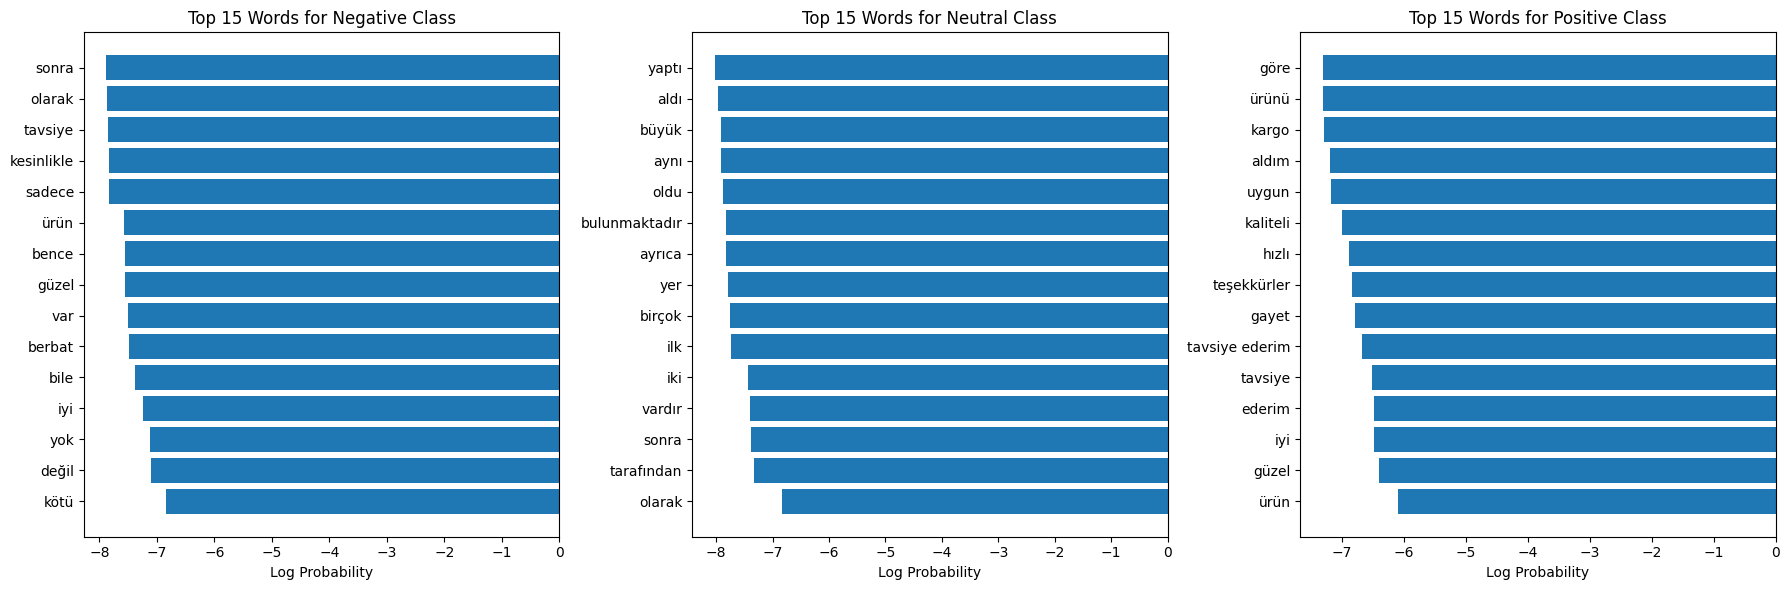

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Log olasılıklarını alın
log_probs = naive_bayes.feature_log_prob_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, cls in enumerate(classes):
    log_prob = log_probs[i]
    top_15_indices = np.argsort(log_prob)[-15:]  # En etkili 15 kelime
    top_15_words = [feature_names[i] for i in top_15_indices]
    top_15_weights = log_prob[top_15_indices]

    # En yüksekten en düşüğe doğru sırala
    sorted_indices = np.argsort(top_15_weights)[::-1]
    top_15_words = [top_15_words[i] for i in sorted_indices]
    top_15_weights = [top_15_weights[i] for i in sorted_indices]

    axs[i].barh(top_15_words, top_15_weights, align='center')
    axs[i].set_xlabel('Log Probability')
    axs[i].set_title(f'Top 15 Words for {cls} Class')
    #axs[i].invert_yaxis()  # Y eksenini ters çevir

plt.tight_layout()
plt.show()


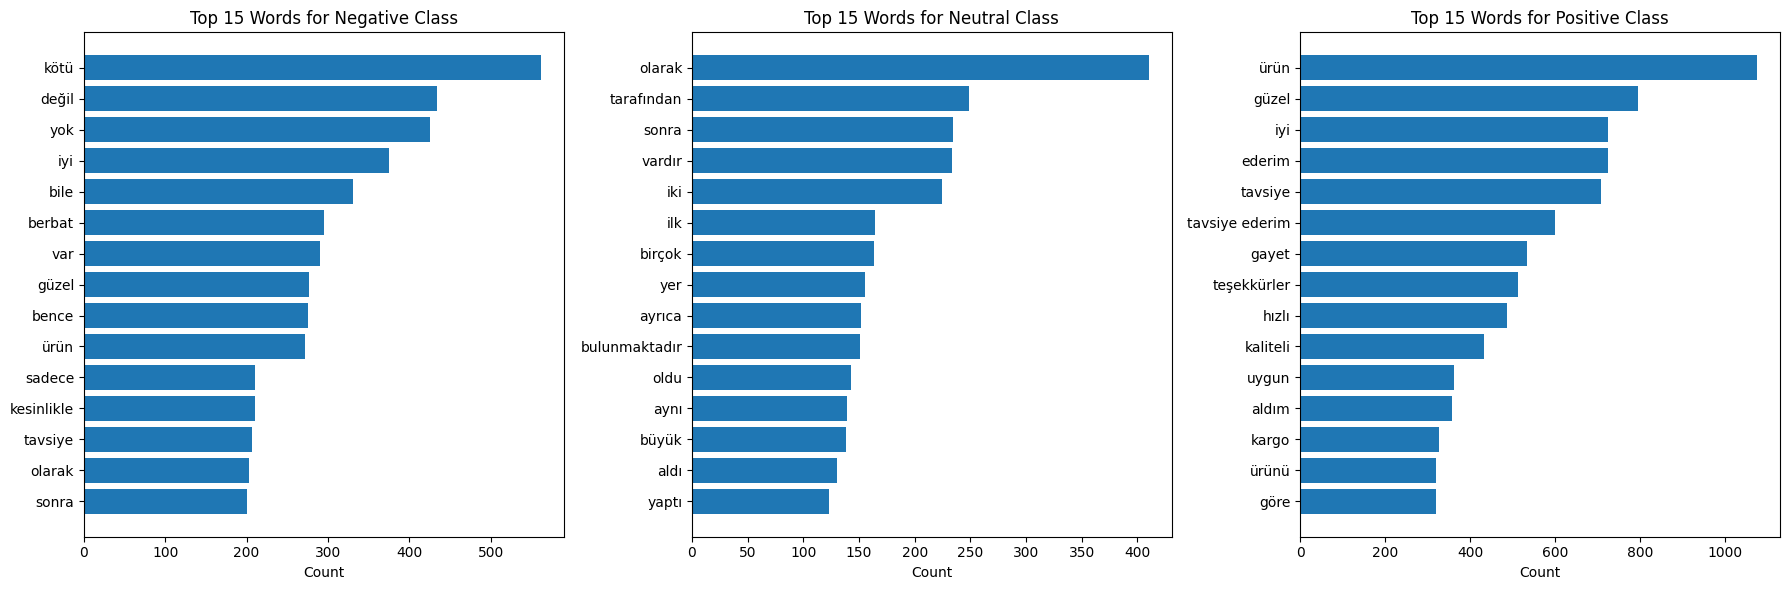

In [ ]:
# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Kelime sayımlarını alın
word_counts = naive_bayes.feature_count_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, cls in enumerate(classes):
    counts = word_counts[i]
    top_15_indices = np.argsort(counts)[-15:]  # En etkili 15 kelime
    top_15_words = [feature_names[i] for i in top_15_indices]
    top_15_counts = counts[top_15_indices]

    # En yüksekten en düşüğe doğru sırala
    sorted_indices = np.argsort(top_15_counts)[::-1]
    top_15_words = [top_15_words[i] for i in sorted_indices]
    top_15_counts = [top_15_counts[i] for i in sorted_indices]

    axs[i].barh(top_15_words, top_15_counts, align='center')
    axs[i].set_xlabel('Count')
    axs[i].set_title(f'Top 15 Words for {cls} Class')
    axs[i].invert_yaxis()  # Y eksenini ters çevir

plt.tight_layout()
plt.show()


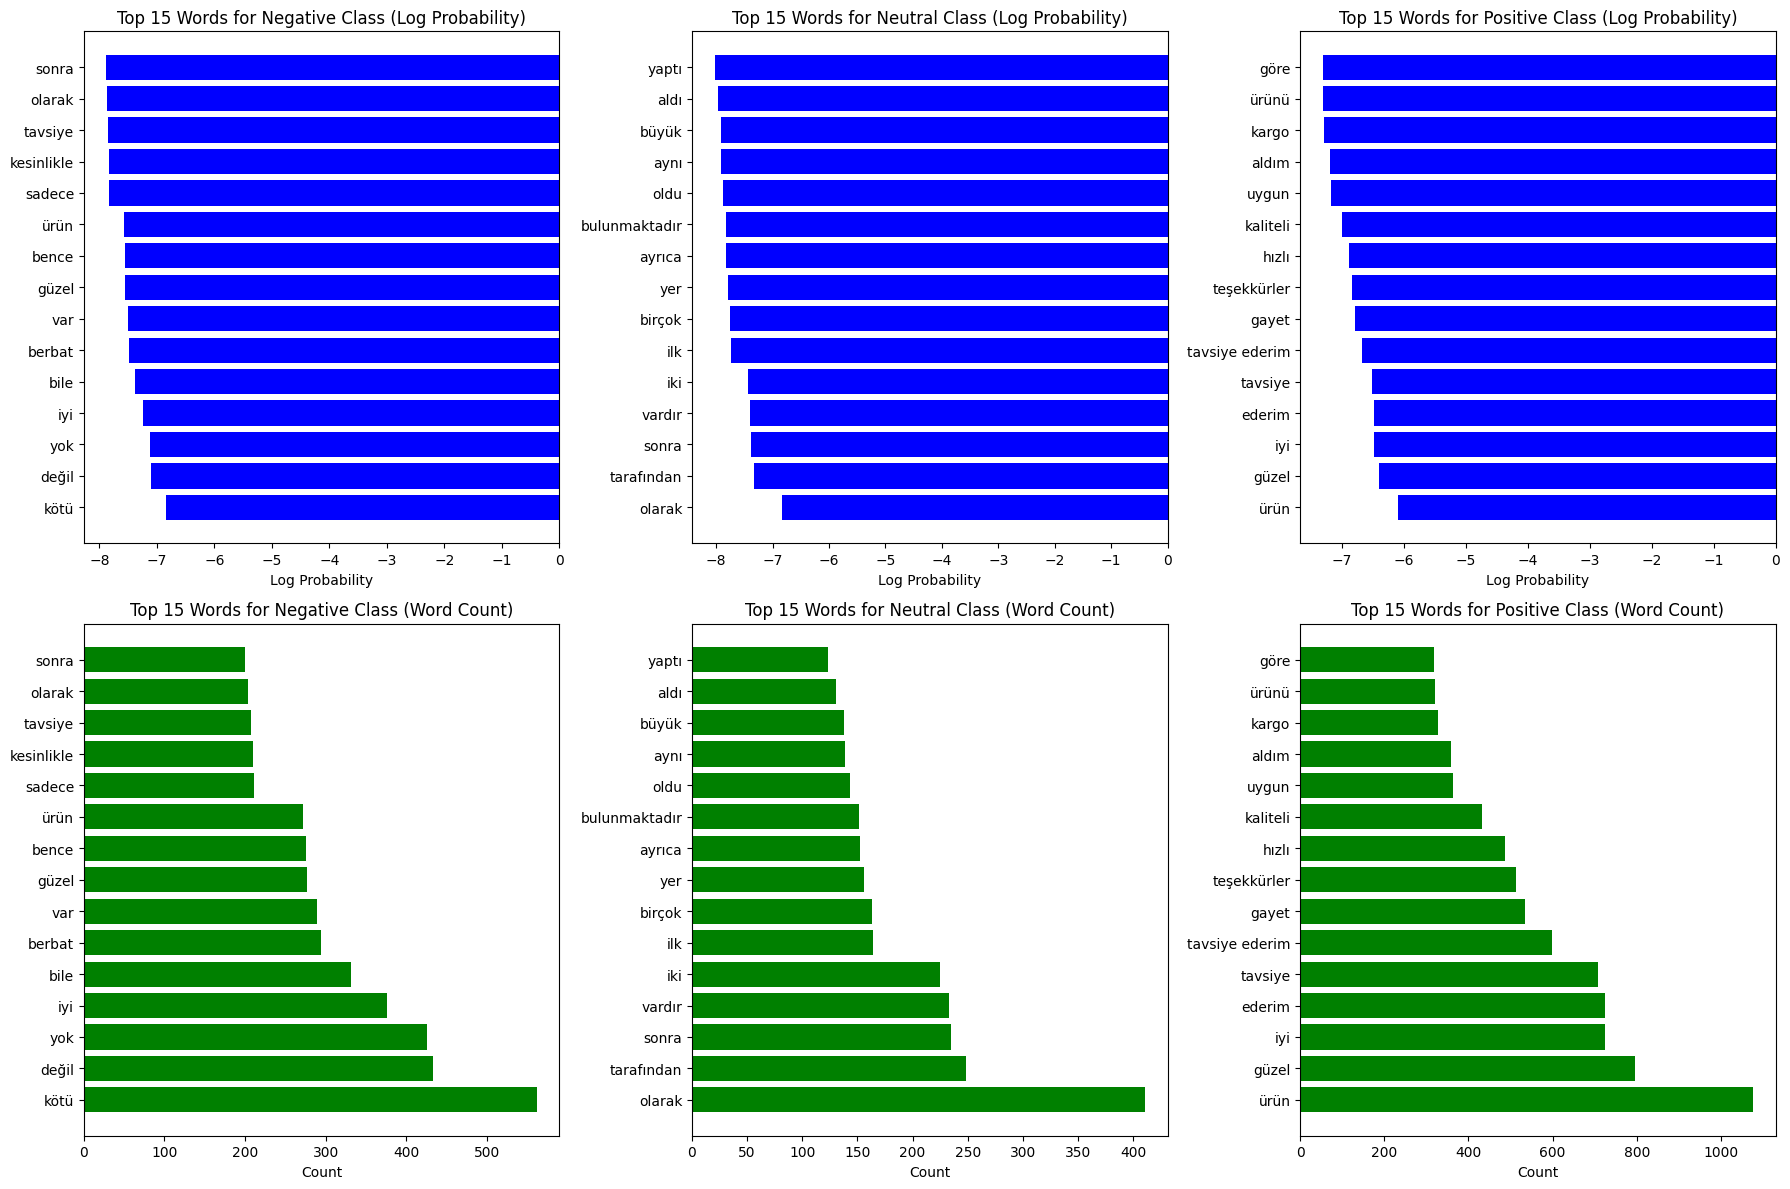

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Log olasılıklarını ve kelime sayımlarını alın
log_probs = naive_bayes.feature_log_prob_
word_counts = naive_bayes.feature_count_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, cls in enumerate(classes):
    # Log Probability tablosu
    log_prob = log_probs[i]
    top_15_indices_log = np.argsort(log_prob)[-15:]  # En etkili 15 kelime
    top_15_words_log = [feature_names[i] for i in top_15_indices_log]
    top_15_weights_log = log_prob[top_15_indices_log]

    axs[0, i].barh(top_15_words_log, top_15_weights_log, align='center', color='blue')
    axs[0, i].set_xlabel('Log Probability')
    axs[0, i].set_title(f'Top 15 Words for {cls} Class (Log Probability)')
    axs[0, i].invert_yaxis()

    # Word Count tablosu
    counts = word_counts[i]
    top_15_indices_count = np.argsort(counts)[-15:]  # En etkili 15 kelime
    top_15_words_count = [feature_names[i] for i in top_15_indices_count]
    top_15_counts = counts[top_15_indices_count]

    # Kelimeleri karşılaştır ve renkleri belirle
    colors = ['green' if word in top_15_words_log else 'blue' for word in top_15_words_count]

    axs[1, i].barh(top_15_words_count, top_15_counts, align='center', color=colors)
    axs[1, i].set_xlabel('Count')
    axs[1, i].set_title(f'Top 15 Words for {cls} Class (Word Count)')
    axs[1, i].invert_yaxis()

plt.tight_layout()
plt.show()


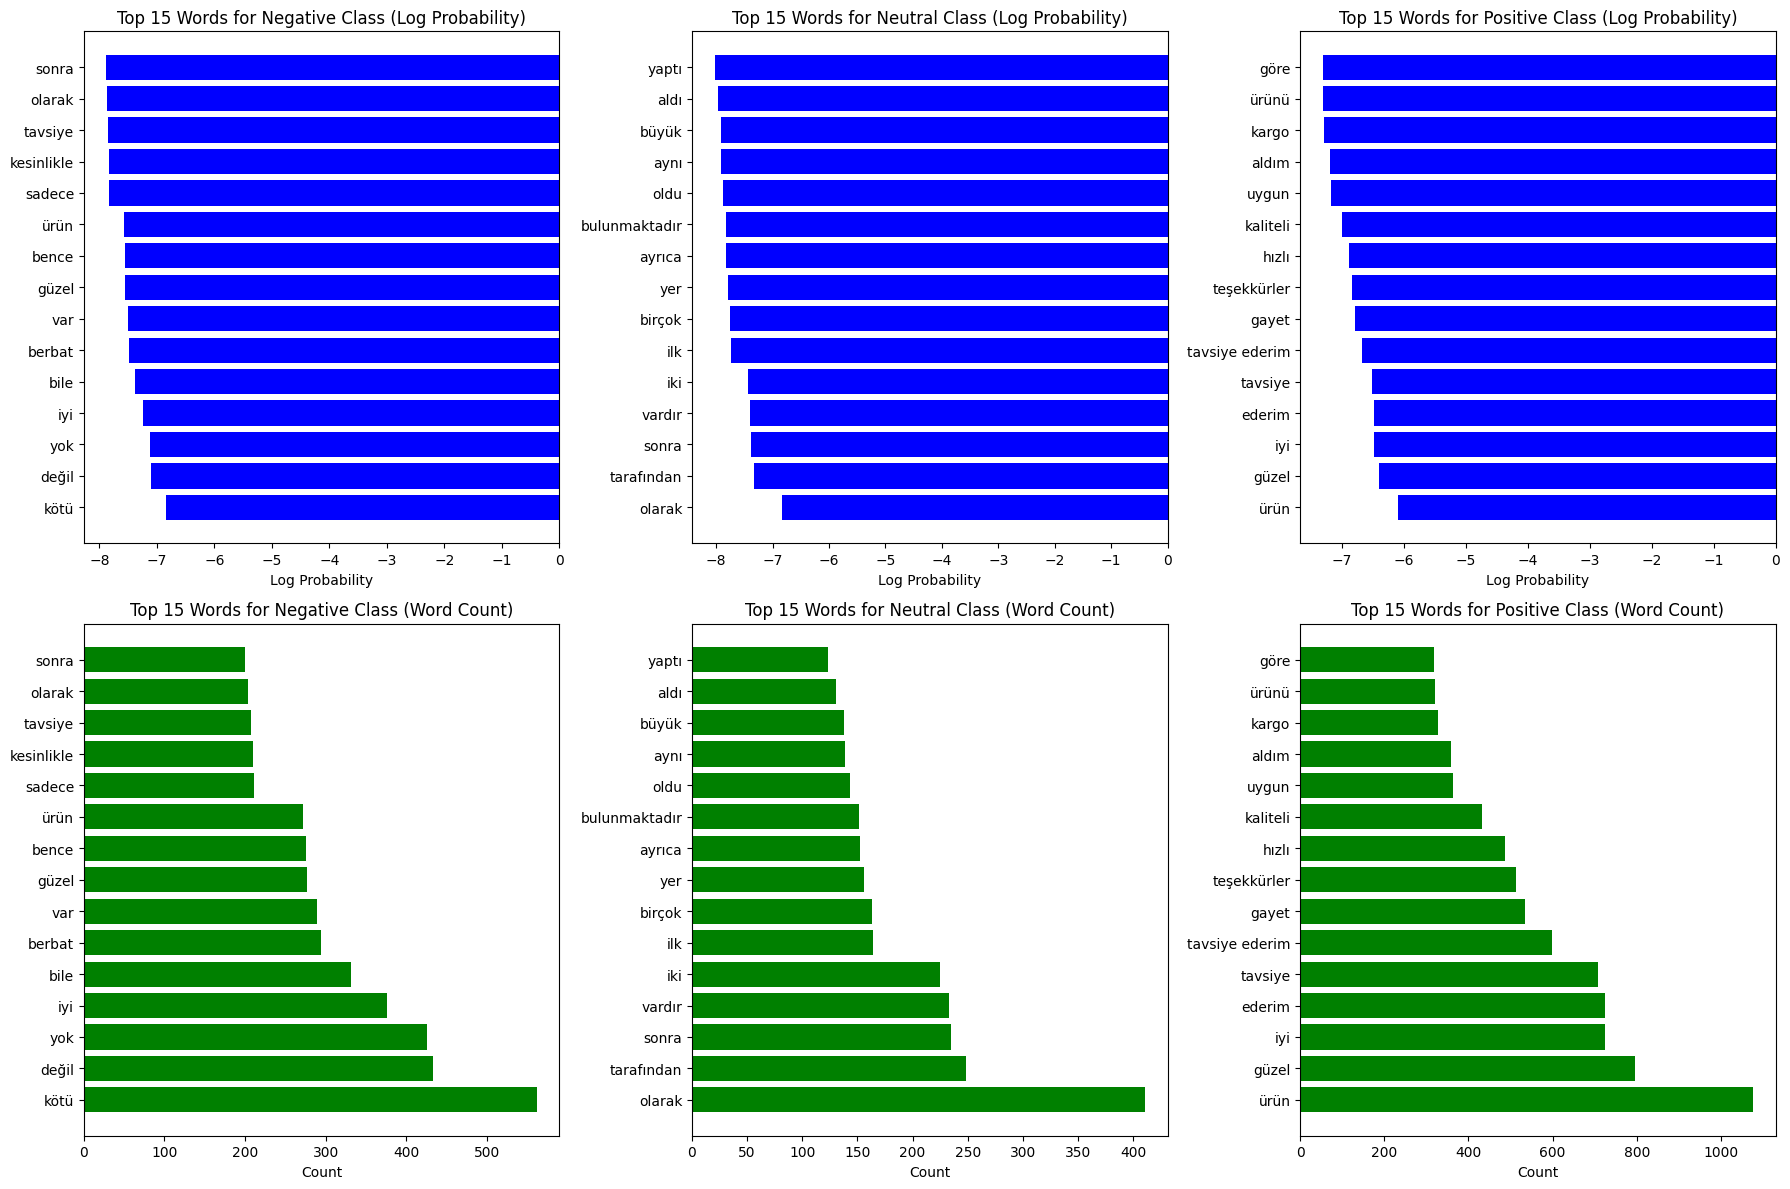

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Log olasılıklarını ve kelime sayımlarını alın
log_probs = naive_bayes.feature_log_prob_
word_counts = naive_bayes.feature_count_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, cls in enumerate(classes):
    # Log Probability tablosu
    log_prob = log_probs[i]
    top_15_indices_log = np.argsort(log_prob)[-15:]  # En etkili 15 kelime
    top_15_words_log = [feature_names[i] for i in top_15_indices_log]
    top_15_weights_log = log_prob[top_15_indices_log]

    axs[0, i].barh(top_15_words_log, top_15_weights_log, align='center', color='blue')
    axs[0, i].set_xlabel('Log Probability')
    axs[0, i].set_title(f'Top 15 Words for {cls} Class (Log Probability)')
    axs[0, i].invert_yaxis()

    # Word Count tablosu
    counts = word_counts[i]
    top_15_indices_count = np.argsort(counts)[-15:]  # En etkili 15 kelime
    top_15_words_count = [feature_names[i] for i in top_15_indices_count]
    top_15_counts = counts[top_15_indices_count]

    # Kelimeleri karşılaştır ve renkleri belirle
    colors = ['green' if word in top_15_words_log else 'blue' for word in top_15_words_count]

    axs[1, i].barh(top_15_words_count, top_15_counts, align='center', color=colors)
    axs[1, i].set_xlabel('Count')
    axs[1, i].set_title(f'Top 15 Words for {cls} Class (Word Count)')
    axs[1, i].invert_yaxis()

plt.tight_layout()
plt.show()


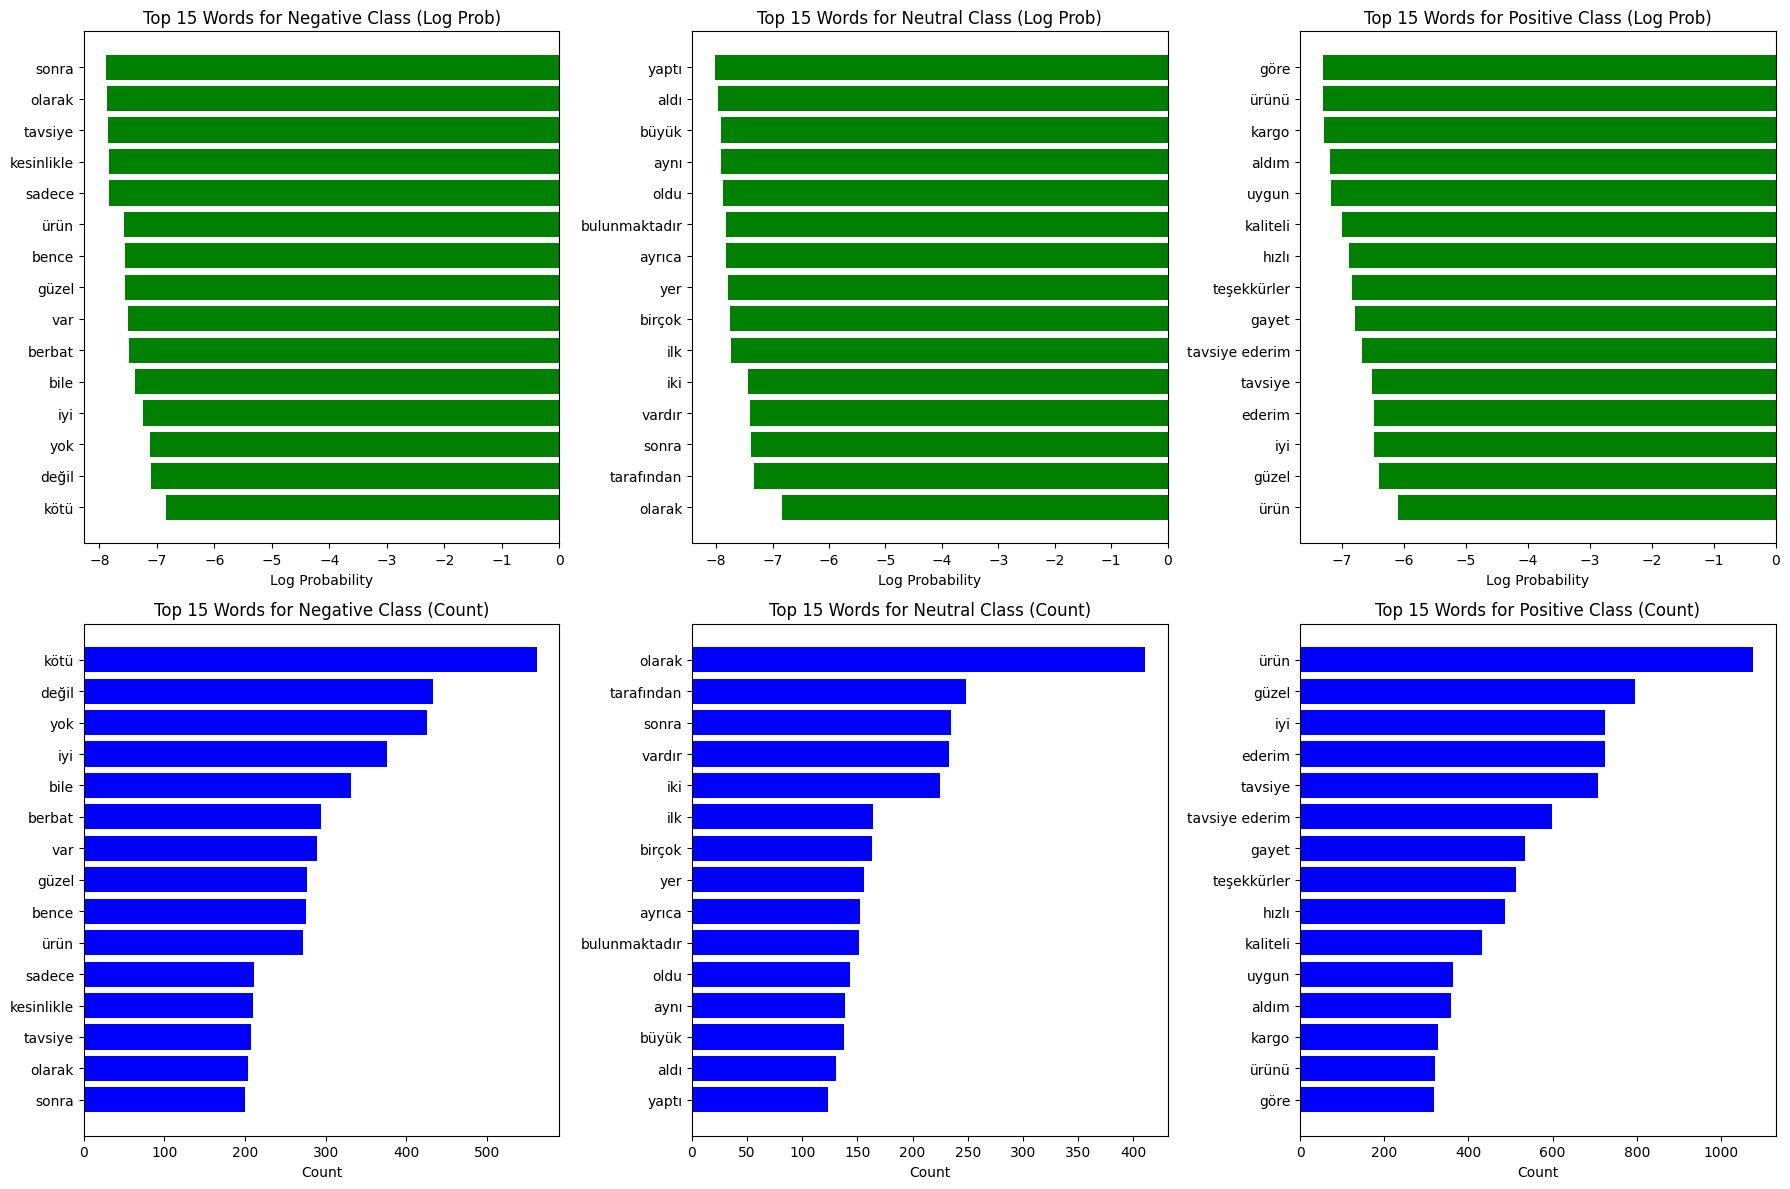

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Log olasılıklarını alın
log_probs = naive_bayes.feature_log_prob_

# Kelime sayımlarını alın
word_counts = naive_bayes.feature_count_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, cls in enumerate(classes):
    # Log olasılıklarını görselleştir
    log_prob = log_probs[i]
    top_15_indices = np.argsort(log_prob)[-15:]
    top_15_words = [feature_names[i] for i in top_15_indices]
    top_15_weights = log_prob[top_15_indices]

    sorted_indices = np.argsort(top_15_weights)[::-1]
    top_15_words = [top_15_words[i] for i in sorted_indices]
    top_15_weights = [top_15_weights[i] for i in sorted_indices]

    axs[0, i].barh(top_15_words, top_15_weights, align='center', color='green')
    axs[0, i].set_xlabel('Log Probability')
    axs[0, i].set_title(f'Top 15 Words for {cls} Class (Log Prob)')

    # Kelime sayımlarını görselleştir
    counts = word_counts[i]
    top_15_indices = np.argsort(counts)[-15:]
    top_15_words = [feature_names[i] for i in top_15_indices]
    top_15_counts = counts[top_15_indices]

    sorted_indices = np.argsort(top_15_counts)[::-1]
    top_15_words = [top_15_words[i] for i in sorted_indices]
    top_15_counts = [top_15_counts[i] for i in sorted_indices]

    axs[1, i].barh(top_15_words, top_15_counts, align='center', color='blue')
    axs[1, i].set_xlabel('Count')
    axs[1, i].set_title(f'Top 15 Words for {cls} Class (Count)')
    axs[1, i].invert_yaxis()

plt.tight_layout()
plt.show()


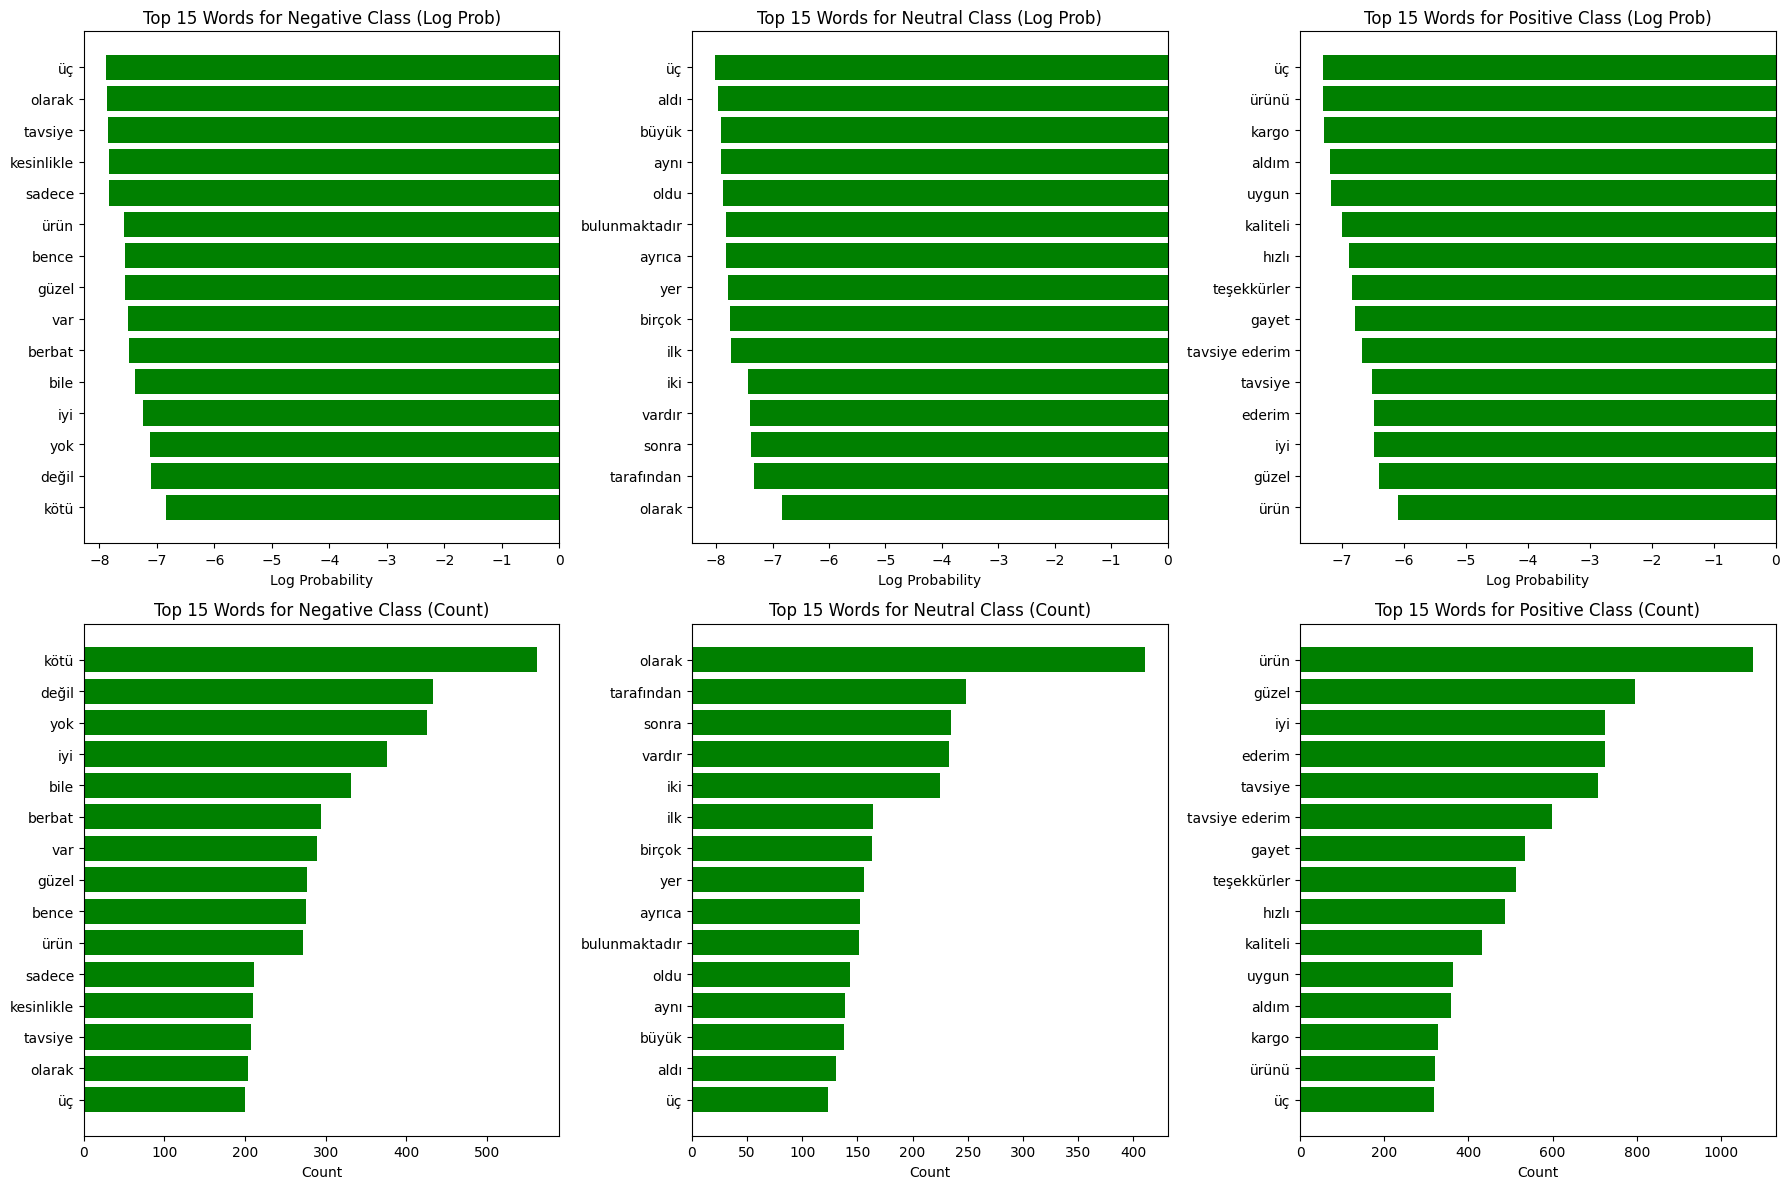

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Log olasılıklarını alın
log_probs = naive_bayes.feature_log_prob_

# Kelime sayımlarını alın
word_counts = naive_bayes.feature_count_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, cls in enumerate(classes):
    # Log olasılıklarını görselleştir
    log_prob = log_probs[i]
    top_15_indices = np.argsort(log_prob)[-15:]
    top_15_words = [feature_names[i] for i in top_15_indices]
    top_15_weights = log_prob[top_15_indices]

    sorted_indices = np.argsort(top_15_weights)[::-1]
    top_15_words = [top_15_words[i] for i in sorted_indices]
    top_15_weights = [top_15_weights[i] for i in sorted_indices]

    # Alt taraftaki tabloyu oluştur
    counts = word_counts[i]
    top_15_indices = np.argsort(counts)[-15:]
    top_15_words = [feature_names[i] for i in top_15_indices]
    top_15_counts = counts[top_15_indices]

    sorted_indices = np.argsort(top_15_counts)[::-1]
    top_15_words = [top_15_words[i] for i in sorted_indices]
    top_15_counts = [top_15_counts[i] for i in sorted_indices]


    # Eşleşen kelimeleri bul ve renklendir
    matching_indices = [j for j, word in enumerate(top_15_words) if word in top_15_words]
    non_matching_indices = [j for j in range(len(top_15_words)) if j not in matching_indices]

    axs[0, i].barh(top_15_words, top_15_weights, align='center', color='green')
    axs[0, i].barh([top_15_words[j] for j in non_matching_indices],
                   [top_15_weights[j] for j in non_matching_indices],
                   align='center', color='blue')
    axs[0, i].set_xlabel('Log Probability')
    axs[0, i].set_title(f'Top 15 Words for {cls} Class (Log Prob)')

    axs[1, i].barh(top_15_words, top_15_counts, align='center', color='blue')
    axs[1, i].barh([top_15_words[j] for j in matching_indices],
                   [top_15_counts[j] for j in matching_indices],
                   align='center', color='green')
    axs[1, i].set_xlabel('Count')
    axs[1, i].set_title(f'Top 15 Words for {cls} Class (Count)')
    axs[1, i].invert_yaxis()

plt.tight_layout()
plt.show()


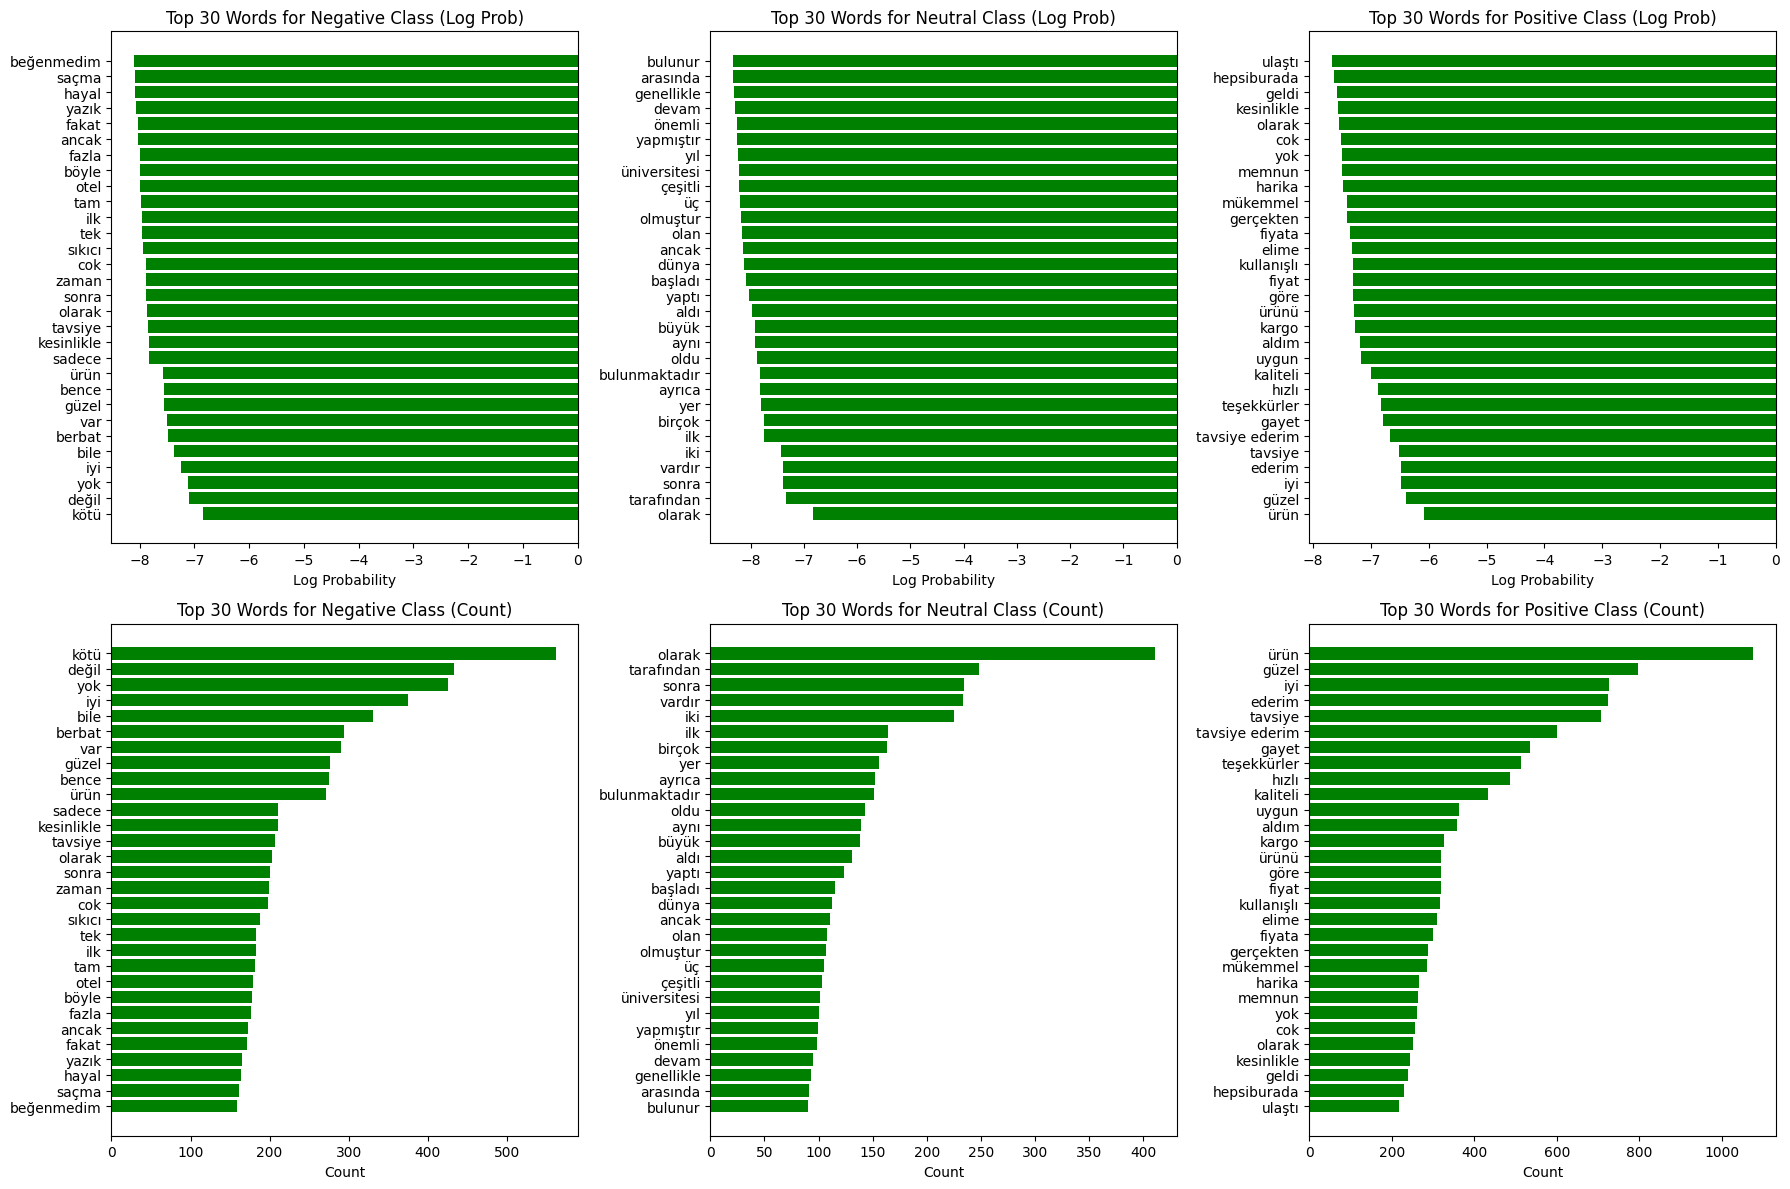

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Log olasılıklarını alın
log_probs = naive_bayes.feature_log_prob_

# Kelime sayımlarını alın
word_counts = naive_bayes.feature_count_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, cls in enumerate(classes):
    # Log olasılıklarını görselleştir
    log_prob = log_probs[i]
    top_30_indices = np.argsort(log_prob)[-30:]
    top_30_words = [feature_names[i] for i in top_30_indices]
    top_30_weights = log_prob[top_30_indices]

    sorted_indices = np.argsort(top_30_weights)[::-1]
    top_30_words = [top_30_words[i] for i in sorted_indices]
    top_30_weights = [top_30_weights[i] for i in sorted_indices]

    # Alt taraftaki tabloyu oluştur
    counts = word_counts[i]
    top_30_indices = np.argsort(counts)[-30:]
    top_30_words = [feature_names[i] for i in top_30_indices]
    top_30_counts = counts[top_30_indices]

    sorted_indices = np.argsort(top_30_counts)[::-1]
    top_30_words = [top_30_words[i] for i in sorted_indices]
    top_30_counts = [top_30_counts[i] for i in sorted_indices]

    # Eşleşen kelimeleri bul ve renklendir
    matching_indices = [j for j, word in enumerate(top_30_words) if word in top_30_words]
    non_matching_indices = [j for j in range(len(top_30_words)) if j not in matching_indices]

    axs[0, i].barh(top_30_words, top_30_weights, align='center', color='green')
    axs[0, i].barh([top_30_words[j] for j in non_matching_indices],
                   [top_30_weights[j] for j in non_matching_indices],
                   align='center', color='blue')
    axs[0, i].set_xlabel('Log Probability')
    axs[0, i].set_title(f'Top 30 Words for {cls} Class (Log Prob)')

    axs[1, i].barh(top_30_words, top_30_counts, align='center', color='blue')
    axs[1, i].barh([top_30_words[j] for j in matching_indices],
                   [top_30_counts[j] for j in matching_indices],
                   align='center', color='green')
    axs[1, i].set_xlabel('Count')
    axs[1, i].set_title(f'Top 30 Words for {cls} Class (Count)')
    axs[1, i].invert_yaxis()

plt.tight_layout()
plt.show()


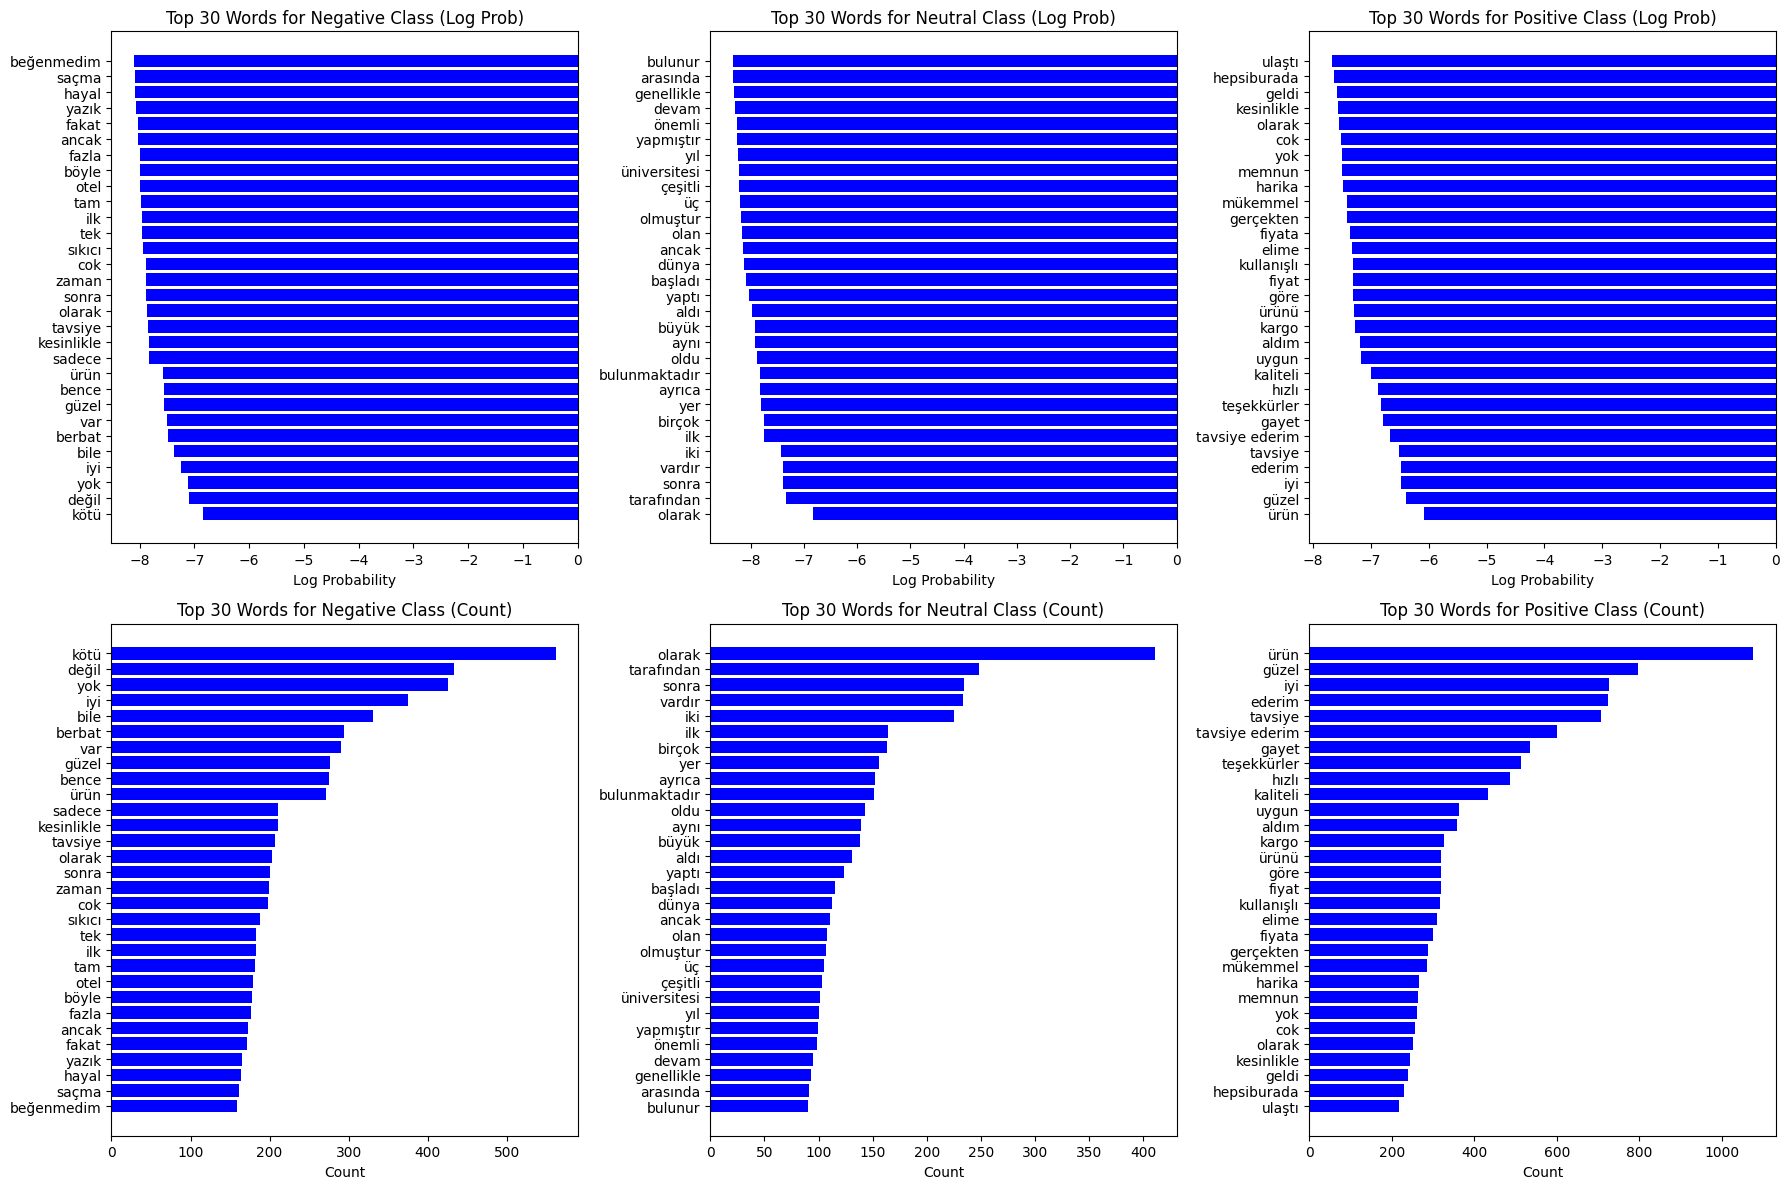

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Log olasılıklarını alın
log_probs = naive_bayes.feature_log_prob_

# Kelime sayımlarını alın
word_counts = naive_bayes.feature_count_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, cls in enumerate(classes):
    # Log olasılıklarını görselleştir
    log_prob = log_probs[i]
    top_30_indices = np.argsort(log_prob)[-30:]
    top_30_words = [feature_names[i] for i in top_30_indices]
    top_30_weights = log_prob[top_30_indices]

    sorted_indices = np.argsort(top_30_weights)[::-1]
    top_30_words = [top_30_words[i] for i in sorted_indices]
    top_30_weights = [top_30_weights[i] for i in sorted_indices]

    # Alt taraftaki tabloyu oluştur
    counts = word_counts[i]
    top_30_indices = np.argsort(counts)[-30:]
    top_30_words_counts = counts[top_30_indices]

    sorted_indices = np.argsort(top_30_words_counts)[::-1]
    top_30_words_counts = [top_30_words_counts[i] for i in sorted_indices]

    # Eşleşen kelimeleri bul ve renklendir
    matching_indices = [j for j, word in enumerate(top_30_words) if word in top_30_words_counts]
    non_matching_indices = [j for j in range(len(top_30_words)) if j not in matching_indices]

    axs[0, i].barh(top_30_words, top_30_weights, align='center', color='green')
    axs[0, i].barh([top_30_words[j] for j in non_matching_indices],
                   [top_30_weights[j] for j in non_matching_indices],
                   align='center', color='blue')
    axs[0, i].set_xlabel('Log Probability')
    axs[0, i].set_title(f'Top 30 Words for {cls} Class (Log Prob)')

    axs[1, i].barh(top_30_words, top_30_words_counts, align='center', color='blue')
    axs[1, i].barh([top_30_words[j] for j in matching_indices],
                   [top_30_words_counts[j] for j in matching_indices],
                   align='center', color='green')
    axs[1, i].set_xlabel('Count')
    axs[1, i].set_title(f'Top 30 Words for {cls} Class (Count)')
    axs[1, i].invert_yaxis()

plt.tight_layout()
plt.show()


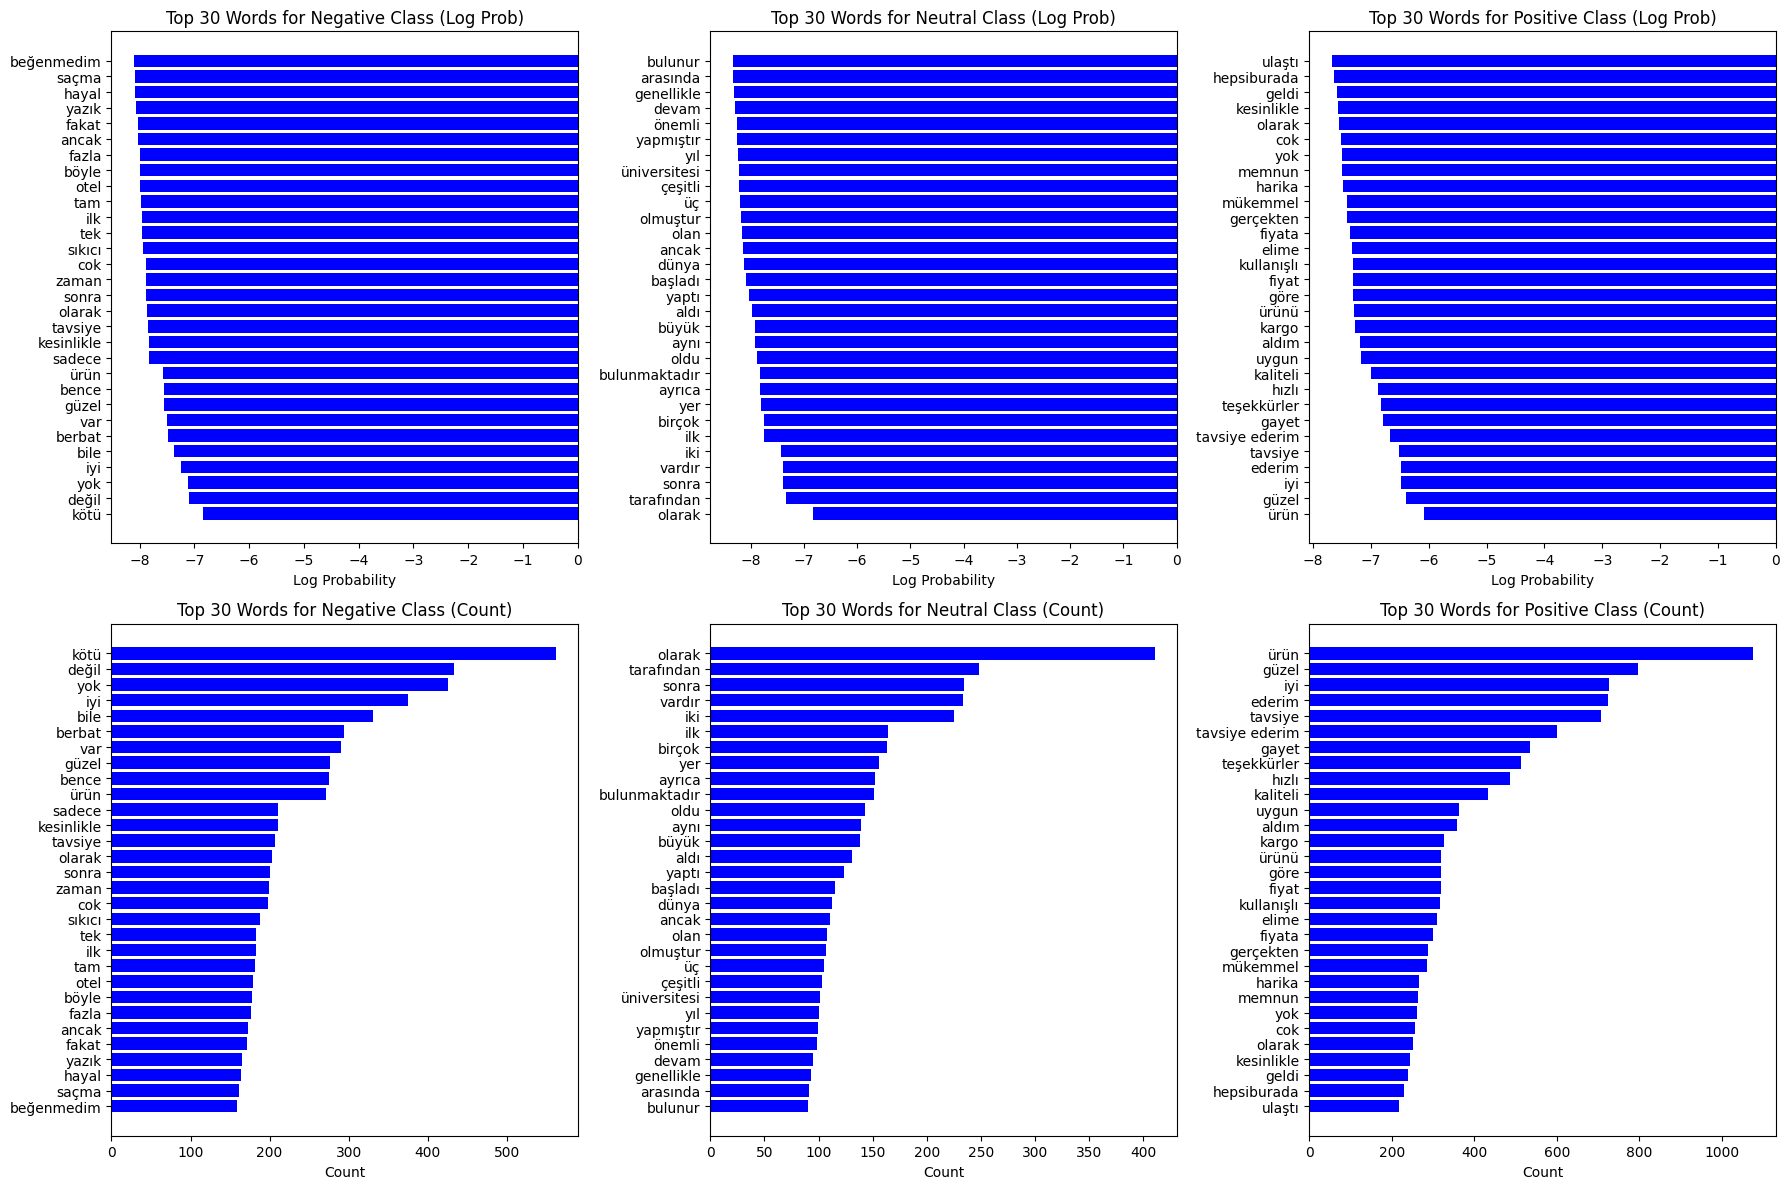

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes modelini pipeline'dan çıkarın
naive_bayes = final_model.named_steps['clf']
feature_names = final_model.named_steps['tfidf'].get_feature_names_out()

# Log olasılıklarını alın
log_probs = naive_bayes.feature_log_prob_

# Kelime sayımlarını alın
word_counts = naive_bayes.feature_count_

# Sınıflar: negatif, nötr, pozitif
classes = ['Negative', 'Neutral', 'Positive']

# Visualization
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, cls in enumerate(classes):
    # Log olasılıklarını görselleştir
    log_prob = log_probs[i]
    top_30_indices = np.argsort(log_prob)[-30:]
    top_30_words = [feature_names[i] for i in top_30_indices]
    top_30_weights = log_prob[top_30_indices]

    sorted_indices = np.argsort(top_30_weights)[::-1]
    top_30_words = [top_30_words[i] for i in sorted_indices]
    top_30_weights = [top_30_weights[i] for i in sorted_indices]

    # Alt taraftaki tabloyu oluştur
    counts = word_counts[i]
    top_30_indices = np.argsort(counts)[-30:]
    top_30_words_counts = counts[top_30_indices]

    sorted_indices = np.argsort(top_30_words_counts)[::-1]
    top_30_words_counts = [top_30_words_counts[i] for i in sorted_indices]

    # Eşleşen kelimeleri bul ve renklendir
    matching_indices = [j for j, word in enumerate(top_30_words) if word in top_30_words_counts]
    non_matching_indices = [j for j in range(len(top_30_words)) if j not in matching_indices]

    axs[0, i].barh(top_30_words, top_30_weights, align='center', color='green')
    axs[0, i].barh([top_30_words[j] for j in non_matching_indices],
                   [top_30_weights[j] for j in non_matching_indices],
                   align='center', color='blue')
    axs[0, i].set_xlabel('Log Probability')
    axs[0, i].set_title(f'Top 30 Words for {cls} Class (Log Prob)')

    axs[1, i].barh(top_30_words, top_30_words_counts, align='center', color='blue')
    axs[1, i].barh([top_30_words[j] for j in matching_indices],
                   [top_30_words_counts[j] for j in matching_indices],
                   align='center', color='green')
    axs[1, i].set_xlabel('Count')
    axs[1, i].set_title(f'Top 30 Words for {cls} Class (Count)')
    axs[1, i].invert_yaxis()

plt.tight_layout()
plt.show()
